## Pie Charts for Category

- Superhero alignment percentage
- Superhero human vs. non-human percentage

## Bar Charts for Sales 

- Sales by Alignment percentage
- Sales by Human Vs. Non-Human percentage 

## Bar Charts for Ratings

- Ratings by Alignment percentage
- Ratings by Human Vs. Non-Human percentage

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [23]:
superhero_data = pd.read_csv('../Datasets/Production_data/Merged_Superhero.csv')
superheroes_unique = superhero_data.drop_duplicates(subset=['Superhero_Name'], keep='first')
superheroes_unique

,Unnamed: 0,Date_Released,Publisher,Superhero_Name,Movie_Title,Rating,IMDB_Votes,Box_Office_Sales,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,rate,Inflation_Sales
0,0,2008,DC,Batman,The Dark Knight,90.0,"2,029,721",533316061,Male,blue,Human,black,188,-,good,18.5,17.4,6.261131e+08
1,1,2008,DC,Punisher,Punisher: War Zone,60.0,"56,730",7948159,Male,blue,Human,Black,183,-,good,9.5,17.4,9.331139e+06
2,2,2008,Marvel,Iron Man,Iron Man,79.0,"842,429",318298180,Male,blue,Human,Black,198,-,good,38.5,17.4,3.736821e+08
3,3,2008,Marvel,Hulk,The Incredible Hulk,68.0,"388,957",134518390,Male,green,Human,Green,244,green,good,29.5,17.4,1.579246e+08
4,4,2009,Marvel,Wolverine,X-Men Origins: Wolverine,66.0,"431,892",179737340,Male,blue,Human,Black,160,-,good,31.5,17.8,2.117306e+08
6,6,2011,Marvel,Ghost Rider,Spirit of Vengeance,43.0,"102,335",51774002,Male,red,Human,No Hair,188,-,good,36.0,12.4,5.819398e+07
7,7,2011,DC,Green Lantern,Green Lantern,55.0,"250,387",116600000,Male,brown,Human,Brown,188,-,good,37.0,12.4,1.310584e+08
8,8,2011,Marvel,Thor,Thor,70.0,"661,810",181015141,Male,blue,Non-Human,Blond,198,-,good,83.5,12.4,2.034610e+08
9,9,2011,Marvel,Captain America,Captain America: The First Avenger,69.0,"641,472",176636816,Male,blue,Human,blond,188,-,good,10.5,12.4,1.985398e+08
11,11,2012,Marvel,Spider-Man,The Amazing Spider-Man,70.0,"520,000",262030663,Male,hazel,Human,Brown,178,-,good,22.5,10.1,2.884958e+08


In [24]:
superhero_alignment = superheroes_unique['Alignment'].value_counts()
superhero_alignment_df = pd.DataFrame(superhero_alignment)
superhero_alignment_df = superhero_alignment_df.rename({
    'bad': 'Bad (Venom)',
    'neutral': 'Neutral (Deadpool)',
    'good': 'Good',
})
superhero_alignment_df

,Alignment
Good,17
Neutral (Deadpool),1
Bad (Venom),1


### Pie Chart - Alignment Percentage

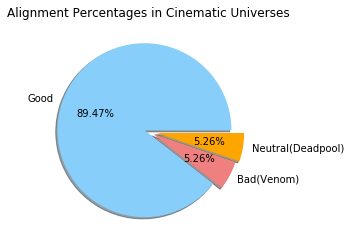

In [37]:
labels = ['Good', 'Bad(Venom)', 'Neutral(Deadpool)']
colors = ['lightskyblue', 'lightcoral', 'orange', 'red']
explode = [0.05, 0.06, 0.1]
plt.pie(superhero_alignment_df, labels=labels, colors=colors, shadow=True, 
        explode=explode, autopct="%1.2f%%")
plt.title("Alignment Percentages in Cinematic Universes")
plt.savefig("../Images/Alignment & Race Plots/Superhero Alignment in Cinematic Universes.png")
plt.show()

### Pie Chart - Alignment Percentage - Good Vs. Bad (TBD)

In [26]:
superheroes_bad = superheroes_unique.loc[superheroes_unique['Alignment'] != 'good']
superheroes_bad

,Unnamed: 0,Date_Released,Publisher,Superhero_Name,Movie_Title,Rating,IMDB_Votes,Box_Office_Sales,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,rate,Inflation_Sales
19,19,2016,Marvel,Deadpool,Deadpool,80.0,"802,733",328674489,Male,brown,Human,No Hair,188,-,neutral,70.5,5.3,3.460942e+08
29,29,2018,Marvel,Venom,Venom,68.0,"245,745",213515506,Male,blue,Non-Human,Strawberry Blond,191,-,bad,20.0,0.7,2.150101e+08


### Pie Chart - Race Percentage

In [27]:
superhero_race_count = superheroes_unique['Race'].value_counts()
superhero_race_df = pd.DataFrame(superhero_race_count)
superhero_race_df

,Race
Human,15
Non-Human,4


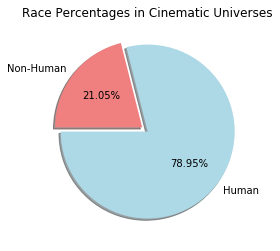

In [38]:
labels = ['Human', 'Non-Human']
colors = ['lightblue','lightcoral']
explode = [0.0, 0.08]
plt.pie(superhero_race_df, labels=labels, colors=colors, explode=explode,
       shadow=True, startangle=180, autopct ='%1.2f%%')
plt.title('Race Percentages in Cinematic Universes')
plt.savefig('../Images/Alignment & Race Plots/Superhero Race in Cinematic Universes.png')
plt.show()

### Bar Chart - Sales by Alignment

In [39]:
superhero_sales_alignment = superheroes_unique[['Box_Office_Sales', 'Alignment']]
superhero_sales_df_alignment = superhero_sales_alignment.groupby('Alignment').mean()
superhero_sales_df_alignment = superhero_sales_df_alignment.rename({
    'bad': 'Bad',
    'neutral': 'Neutral',
    'good': 'Good'
})
superhero_sales_df_alignment

,Box_Office_Sales
Alignment,
Bad,2.135155e+08
Good,2.497634e+08
Neutral,3.286745e+08


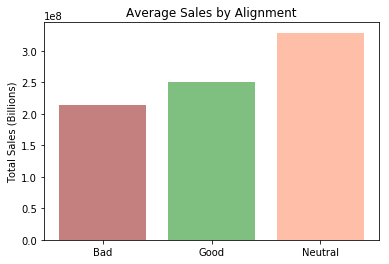

In [40]:
#If possible, create a legend and additional assortment to indicated publisher correlation

x_axis = np.arange(len(superhero_sales_df_alignment))
color = ['darkred','g','coral']
plt.xticks(x_axis, superhero_sales_df_alignment.index, rotation=0)
plt.bar(x_axis, superhero_sales_df_alignment['Box_Office_Sales'], color=color, alpha=.5, align="center")

#Labels and Title

plt.ylabel("Total Sales (Billions)")
plt.title("Average Sales by Alignment")
plt.savefig('../Images/Alignment & Race Plots/Average Sales by Alignment.png')
plt.show()

### Bar Chart - Sales by Race

In [41]:
superhero_sales_race = superheroes_unique[['Box_Office_Sales', 'Race']]
superhero_sales_df_race = superhero_sales_race.groupby('Race').mean()
superhero_sales_df_race

,Box_Office_Sales
Race,
Human,2.511702e+08
Non-Human,2.551535e+08


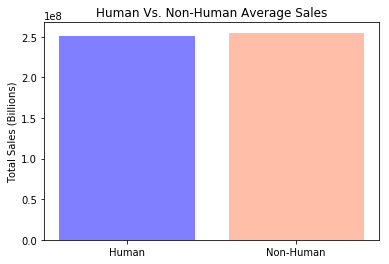

In [42]:
#If possible, create a legend and additional assortment to indicated publisher correlation

x_axis = np.arange(len(superhero_sales_df_race))
color = ['b', 'coral']
plt.xticks(x_axis, superhero_sales_df_race.index, rotation=0)
plt.bar(x_axis, superhero_sales_df_race['Box_Office_Sales'], color=color, alpha=.5, align="center")

#Labels and Title

plt.ylabel("Total Sales (Billions)")
plt.title("Human Vs. Non-Human Average Sales")
plt.savefig('../Images/Alignment & Race Plots/Human Vs. Non-Human Average Sales.png')
plt.show()

### Bar Chart - Ratings by Alignment

In [43]:
# bar chart for ratings by alignment    
ratings_grouped = superheroes_unique.groupby(['Alignment'])

ratings_by_alignment = ratings_grouped['Rating'].mean()
ratings_by_alignment_df = pd.DataFrame({'Average Rating'
                                        : ratings_by_alignment})

ratings_by_alignment_df = ratings_by_alignment_df.rename({
   'bad': 'Bad',
    'neutral': 'Neutral',
    'good': 'Good' 
})

ratings_by_alignment_df

,Average Rating
Alignment,
Bad,68.000000
Good,69.294118
Neutral,80.000000


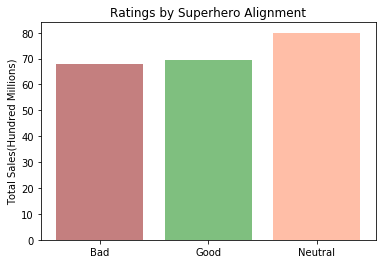

In [44]:
# plot bar chart for ratings by alignment

x_axis = np.arange(len(ratings_by_alignment_df))
color = ['darkred','g','coral']
plt.xticks(x_axis,ratings_by_alignment_df.index, rotation=0)
plt.bar(x_axis,ratings_by_alignment_df['Average Rating']
        , alpha=.5, align='center', color=color)
plt.title('Ratings by Superhero Alignment')
plt.ylabel('Total Sales(Hundred Millions)')
plt.savefig('../Images/Alignment & Race Plots/Ratings_by_Alignment_bar.png')
plt.show()

### Bar Chart - Ratings by Race

In [45]:
# bar chart for ratings by race    
races_ratings_grouped = superheroes_unique.groupby(['Race'])

ratings_by_race = races_ratings_grouped['Rating'].mean()
ratings_by_race_df = pd.DataFrame({'Average Rating'
                                        : ratings_by_race})

ratings_by_race_df = ratings_by_race_df.rename({
   'bad': 'Bad (Venom)',
    'neutral': 'Neutral (Deadpool)',
    'good': 'Good' 
})

ratings_by_race_df

,Average Rating
Race,
Human,69.666667
Non-Human,70.250000


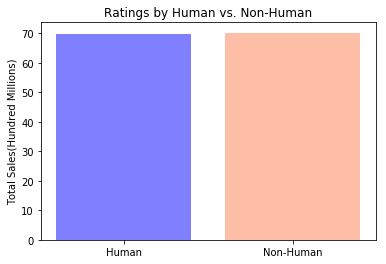

In [46]:
# plot bar chart for ratings by race

x_axis = np.arange(len(ratings_by_race_df))
color = ['b', 'coral']
plt.xticks(x_axis,ratings_by_race_df.index, rotation=0)
plt.bar(x_axis,ratings_by_race_df['Average Rating']
        , alpha=.5, align='center', color=color)
plt.title('Ratings by Human vs. Non-Human')
plt.ylabel('Total Sales(Hundred Millions)')
plt.savefig('../Images/Alignment & Race Plots/Ratings_by_race_bar.png')
plt.show()